### Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
dataset_dir = "SignLanguageDataset"

In [23]:

validation_split = 0.2


train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.3,
    brightness_range=[0.7, 1.3],  
    zoom_range=0.3,
    height_shift_range=0.2,
    validation_split=validation_split,
    horizontal_flip=False,
    fill_mode='nearest'
)


train_generator = train_val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training',
    shuffle=True
)

val_generator = train_val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation',
    shuffle=True
)

Found 1988 images belonging to 4 classes.
Found 494 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


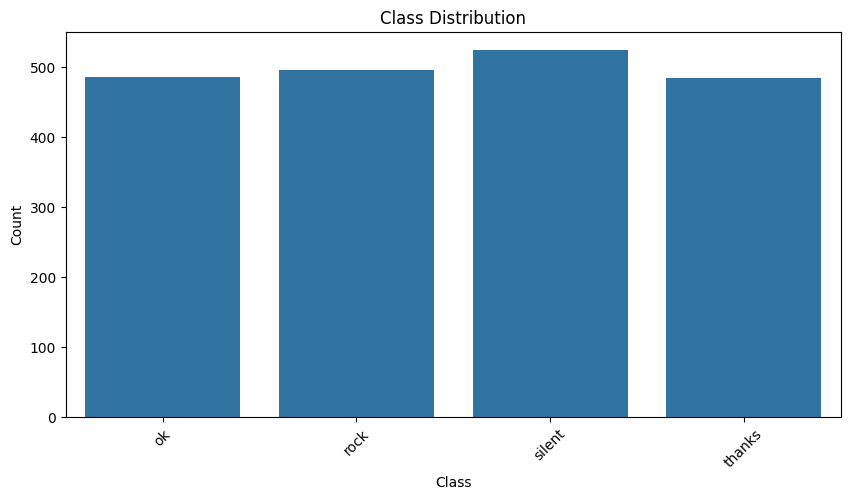

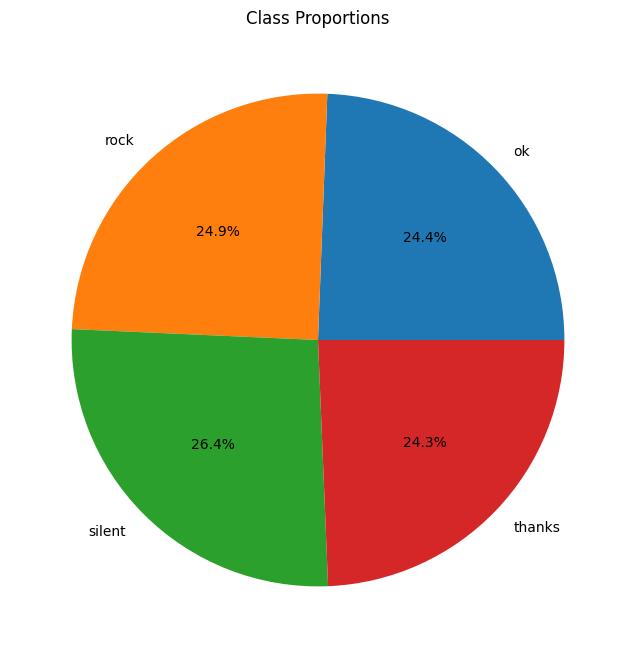

In [24]:

class_counts = train_generator.classes
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)


plt.figure(figsize=(10, 5))
sns.countplot(x=class_counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=range(len(class_names)), labels=class_names)
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(np.bincount(class_counts), labels=class_names, autopct='%1.1f%%')
plt.title("Class Proportions")
plt.show()

In [39]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.0005), input_shape=(224, 224, 1)),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.0005)),
    MaxPooling2D(2,2),
    
    Conv2D(256, (3,3), activation='relu', kernel_regularizer=l2(0.0005)),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 26, 26, 256)     

Epoch 1/20
63/63 [==============================] - 10s 116ms/step - loss: 1.5431 - accuracy: 0.4150 - val_loss: 1.1866 - val_accuracy: 0.6113
Epoch 2/20
63/63 [==============================] - 6s 102ms/step - loss: 1.1698 - accuracy: 0.5915 - val_loss: 1.0713 - val_accuracy: 0.6417
Epoch 3/20
63/63 [==============================] - 6s 93ms/step - loss: 1.0077 - accuracy: 0.6459 - val_loss: 1.1654 - val_accuracy: 0.6053
Epoch 4/20
63/63 [==============================] - 6s 102ms/step - loss: 0.8864 - accuracy: 0.7128 - val_loss: 1.0066 - val_accuracy: 0.7004
Epoch 5/20
63/63 [==============================] - 6s 92ms/step - loss: 0.8726 - accuracy: 0.7012 - val_loss: 0.9160 - val_accuracy: 0.6964
Epoch 6/20
63/63 [==============================] - 6s 92ms/step - loss: 0.7715 - accuracy: 0.7560 - val_loss: 1.0755 - val_accuracy: 0.6579
Epoch 7/20
63/63 [==============================] - 6s 101ms/step - loss: 0.7132 - accuracy: 0.7892 - val_loss: 0.9300 - val_accuracy: 0.7308
Epoch 8/

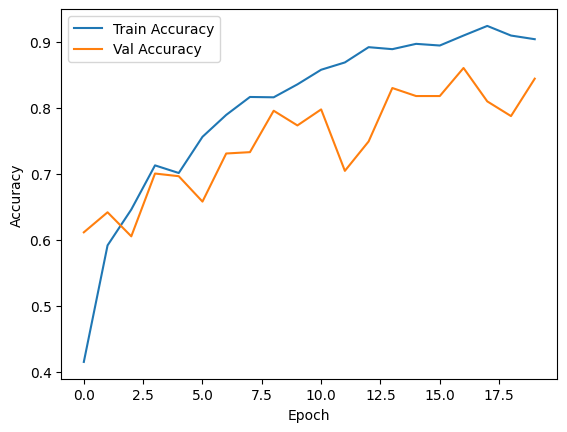

In [40]:

checkpoint = ModelCheckpoint(
    "keras_modeI.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5
)


history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop]
)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()